<a href="https://colab.research.google.com/github/heidimag/DS1000/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5

In this lab we cover:

1. Scatterplots
2. Linear correlation (Pearson correlation coefficient)

## Import necessary Python libraries

**scipy.stats:** https://docs.scipy.org/doc/scipy/reference/stats.html

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In this lab we are going to work with the `auto` dataset. We have five variables described below.

### Variable description

- mpg: miles per gallon <br>
- horsepower:  Engine horsepower <br>
- weight: Vehicle weight (lbs.)  <br>
- origin: Origin of car (American, European, Japanese) <br>
- name: Vehicle name


## Import the data

The data is a subset of the Auto dataset available at: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [ ]:
# Read .csv data

#auto = pd.read_csv("auto.csv")
auto = pd.read_csv("auto.csv")
auto.head(10)

,mpg,horsepower,weight,origin,name
0,18.0,130,3504,American,chevrolet chevelle malibu
1,15.0,165,3693,American,buick skylark 320
2,18.0,150,3436,American,plymouth satellite
3,16.0,150,3433,American,amc rebel sst
4,17.0,140,3449,American,ford torino
5,15.0,198,4341,American,ford galaxie 500
6,14.0,220,4354,American,chevrolet impala
7,14.0,215,4312,American,plymouth fury iii
8,14.0,225,4425,American,pontiac catalina
9,15.0,190,3850,American,amc ambassador dpl


In [ ]:
# Displaying the last 5 rows
auto.tail()

,mpg,horsepower,weight,origin,name
387,27.0,86,2790,American,ford mustang gl
388,44.0,52,2130,European,vw pickup
389,32.0,84,2295,American,dodge rampage
390,28.0,79,2625,American,ford ranger
391,31.0,82,2720,American,chevy s-10


#### Selecting columns/rows/entries in a DataFrame

Recall: We can use `.iloc` or `.loc` functions from pandas library to select observations in a DataFrame.

Let's select the informations for the ford torino which represents the 5th row in the dataset.

In [ ]:
auto.iloc[4,:]

,4
mpg,17.0
horsepower,140
weight,3449
origin,American
name,ford torino


**Practice** Select the information about weight for the ford galaxie 500. You need to use the indeces for the row and column we want.

In [ ]:
# your code here
print("Ford Galaxie 500 Weight:", auto.iloc[5,2])

Ford Galaxie 500 Weight: 4341


#### Size of a DataFrame

To get information about the number of rows and columns we can use `.shape` method. As a result, we will get `(#rows, #columns)`

In [ ]:
auto.shape

(392, 5)

#### Variable types

The `.dtypes` method used in DataFrame gives the type of each variable we have in the DataFrame.

In [ ]:
auto.dtypes

,0
mpg,float64
horsepower,int64
weight,int64
origin,object
name,object


#### Convert the type of a variable

We can use the `.astype()` function to convert a variable's type. Let's convert the type of the variables `origin` and `name` to be categorical variables.

In [ ]:
auto['name'] = auto['name'].astype('category')
auto['origin'] = auto['origin'].astype('category')
auto.dtypes

,0
mpg,float64
horsepower,int64
weight,int64
origin,category
name,category


#### Descriptive stastistics for numerical variables

We can use the `.describe()` function to get the five-number summary, mean, standard deviation and number of observations for each numerical variable in our DataFrame.

In [ ]:
auto.describe()

,mpg,horsepower,weight
count,392.000000,392.000000,392.000000
mean,23.445918,104.469388,2977.584184
std,7.805007,38.491160,849.402560
min,9.000000,46.000000,1613.000000
25%,17.000000,75.000000,2225.250000
50%,22.750000,93.500000,2803.500000
75%,29.000000,126.000000,3614.750000
max,46.600000,230.000000,5140.000000


from matplotlib import pyplot as plt
_df_0['mpg'].plot(kind='hist', bins=20, title='mpg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['horsepower'].plot(kind='hist', bins=20, title='horsepower')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['weight'].plot(kind='hist', bins=20, title='weight')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='mpg', y='horsepower', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='horsepower', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['mpg'].plot(kind='line', figsize=(8, 4), title='mpg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['horsepower'].plot(kind='line', figsize=(8, 4), title='horsepower')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['weight'].plot(kind='line', figsize=(8, 4), title='weight')
plt.gca().spines[['top', 'right']].set_visible(False)

## Scatterplots

**sns.scatterplot:** https://seaborn.pydata.org/generated/seaborn.scatterplot.html

- Scatter plots are used to observe relationships between variables.
- In the scatterplot the x axis is generally the name of a predictor/independent variable.
- In the scatterplot the y axis is generally the name of a response/dependent variable.

#### Relationship between weight and mpg

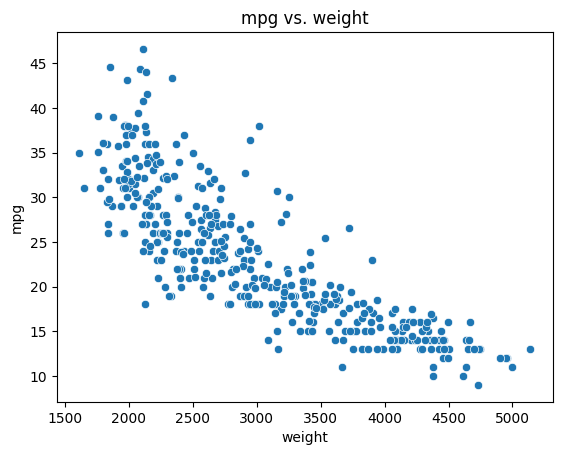

In [ ]:
sns.scatterplot(x = "weight", y = "mpg", data = auto)
plt.title("mpg vs. weight")
plt.show()

**Interpretation:**
    
- It can be seen that there is a negative relationship between "mpg" (miles per gallon) and "weight".
- The heavier the car fewer miles per gallon it will make.

#### Adding a categorical variable to a scatterplot

We can color the points in a scatterplot by the categories in a categorical variable using `hue = name_categ_variable` in the `scatterplot` function.

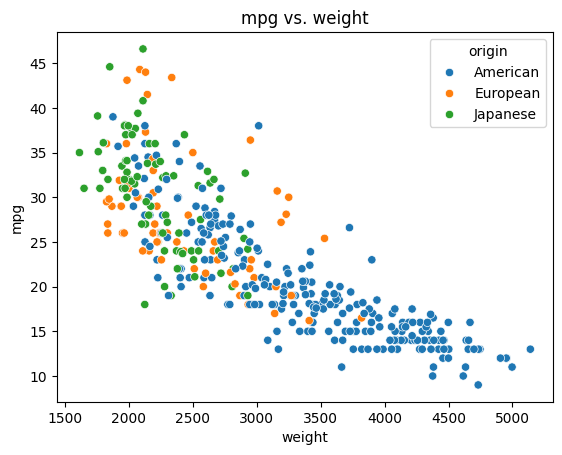

In [ ]:
# coloring the points according to the origin of the car
sns.scatterplot(x = "weight", y = "mpg", hue = 'origin', data = auto)
plt.title("mpg vs. weight")
plt.show()

#### Relationship between horsepower and mpg

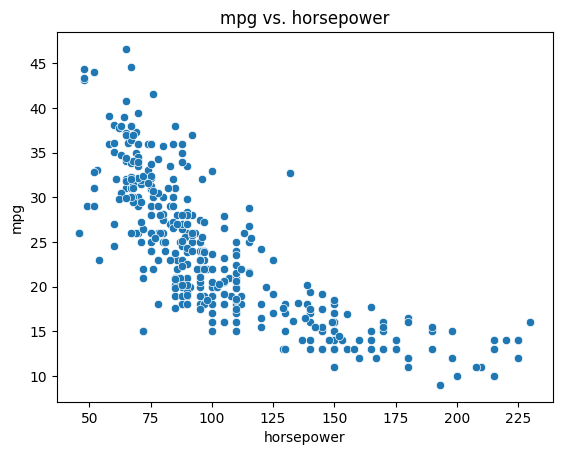

In [ ]:
sns.scatterplot(x = "horsepower", y = "mpg", data = auto)
plt.title("mpg vs. horsepower")
plt.show()

**Practice:** What can we observe in the scatterplot? Are the variables (horsepower and mpg) negatively or positively correlated?
    
**Answer:**

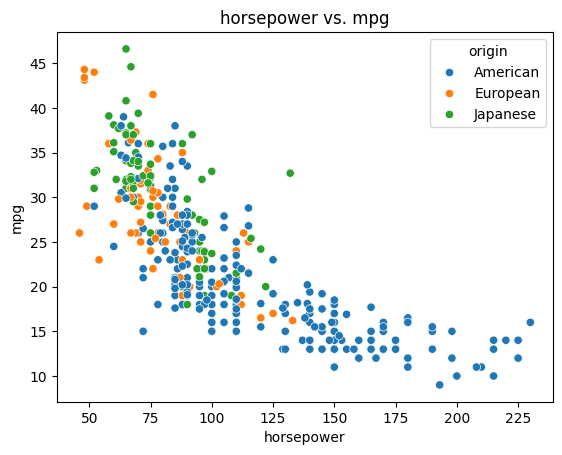

In [ ]:
# coloring the points according to the origin of the car
sns.scatterplot(x = "horsepower", y = "mpg", hue = "origin", data = auto)
plt.title("horsepower vs. mpg")
plt.show()

### Pairplots

**sns.pairplot:** https://seaborn.pydata.org/generated/seaborn.pairplot.html

- The pairplot shows the scatterplots between all pairs of quantitative variables in a dataset.
- It also shows the histogram of each individual variable.

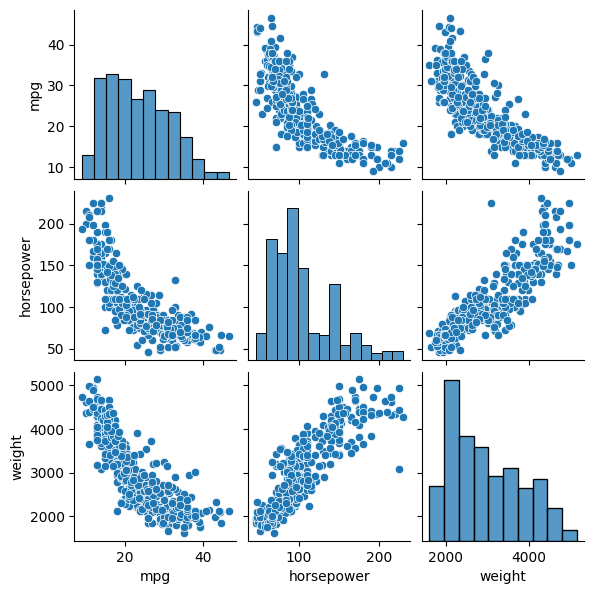

In [ ]:
sns.pairplot(auto, height = 2, kind = 'scatter')
plt.show()

## Pearson correlation coefficient r

**stats.pearsonr:** https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html

The Pearson correlation coefficient is a single number that describes the extent of the linear relationship between two variables.

- The coefficient varies between -1 and +1 with 0 implying no correlation.
- Correlations of -1 or +1 imply an exact linear relationship.
- Positive correlations imply that as x increases, so does y.
- Negative correlations imply that as x increases, y decreases.


In [37]:
#r = stats.pearsonr(auto['weight'], auto['mpg'])[0]
r = stats.pearsonr(auto['mpg'], auto['weight'])[0]
r

-0.8322442148315753

**Interpretation:** There is a strong negative linear correlation between "weight" and "mpg".

**Practice:** Report the Pearson correlation coefficient for `horsepower` and `mpg`. What can you say about the linear relationship between the two variables? Is it strong? Is is positive or negative?

In [ ]:
# your code here
r = stats.pearsonr(auto['horsepower'], auto['mpg'])[0]
r
print(r,"\nThe linear relationship is strongly negative")

-0.7784267838977761 
The linear relationship is strongly negative


**Interpretation:** your answer here

### Correlation matrix

A correlation matrix can be used to show the correlation coefficient between all pairs of quantitative variables in a dataset.

- Every correlation matrix is symmetrical.
- The correlation between each variable and itself is 1, hence the diagonal.

**DataFrame.corr:** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [ ]:
corr_matrix = auto.select_dtypes(include=['number']).corr(method = 'pearson')
round(corr_matrix, 2)

,mpg,horsepower,weight
mpg,1.00,-0.78,-0.83
horsepower,-0.78,1.00,0.86
weight,-0.83,0.86,1.00


### Heatmaps

Heatmaps replace numbers with colors of varying shades, as indicated by the scale on the right.

This type of visualization can make it easier to spot linear relationships between variables than a table of numbers.

**sns.heatmap:** https://seaborn.pydata.org/generated/seaborn.heatmap.html

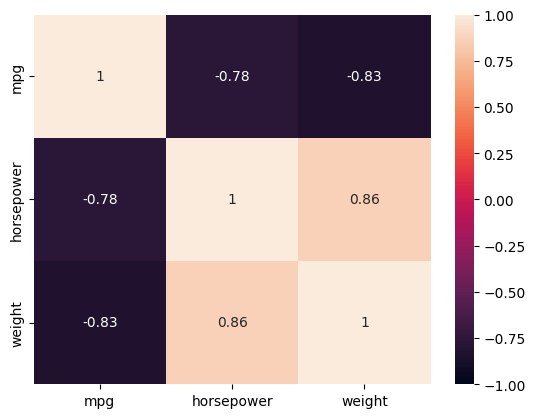

In [ ]:
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True)
plt.show()

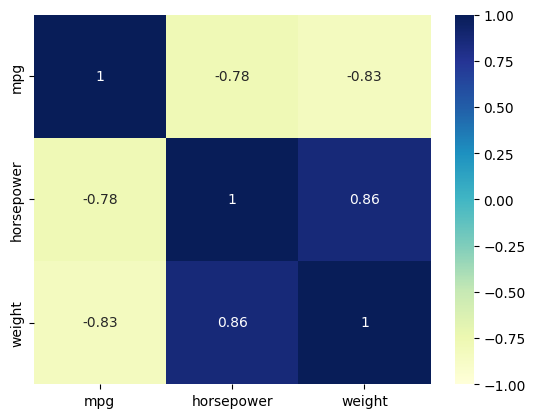

In [ ]:
# heatmap with a different color scheme: "YlGnBu"
sns.heatmap(corr_matrix, vmin = -1, vmax = 1, annot = True, cmap="YlGnBu")
plt.show()